## Importing Necessary Libraries

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Checking out the dataset

In [2]:
df = pd.read_excel('data/copy_loan.xlsx')
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
580,LP002892,Male,Yes,2,Graduate,No,6540,0.0,205.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Cleaning The dataset

In [6]:
df.Dependents.unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [7]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [8]:
df.Gender.unique(), df.Gender.value_counts()

(array(['Male', 'Female', nan], dtype=object),
 Gender
 Male      489
 Female    112
 Name: count, dtype: int64)

In [9]:
# df[df.Gender.fillna('Male')

In [10]:
df.dropna(subset=['Married'], inplace = True)

In [11]:
df.shape

(611, 13)

In [12]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
df.Gender.value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

In [14]:
df['Gender'] = df.Gender.fillna('Male')

In [15]:
df.Dependents.unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [16]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df.Dependents = df.Dependents.fillna(0)

In [18]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df.Self_Employed.value_counts()

Self_Employed
No     497
Yes     82
Name: count, dtype: int64

In [20]:
df[df.Self_Employed.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [21]:
df_top = df[df.index < 600]
df_bottom = df[df.index >= 600]

In [22]:
df_top.shape, df_bottom.shape

((597, 13), (14, 13))

In [23]:
df_top.loc[:,'Self_Employed'] = df_top.Self_Employed.fillna('No')
df_bottom.loc[:,'Self_Employed'] = df_bottom.Self_Employed.fillna('Yes')

In [24]:
df = pd.concat([df_top, df_bottom])

In [25]:
df.shape

(611, 13)

In [26]:
df.Self_Employed.value_counts()

Self_Employed
No     527
Yes     84
Name: count, dtype: int64

In [27]:
loan_amt_mean = df.LoanAmount.mean()
df.LoanAmount = df.LoanAmount.fillna(loan_amt_mean)

In [28]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [29]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    511
180.0     44
480.0     14
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [30]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [31]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [32]:
df.Credit_History.value_counts()

Credit_History
1.0    472
0.0     89
Name: count, dtype: int64

In [33]:
df_top = df[df.index < 306]
df_bottom = df[df.index >= 306]

In [34]:
df_top.shape, df_bottom.shape

((304, 13), (307, 13))

In [35]:
df_top.loc[:,'Credit_History'] = df_top.Credit_History.fillna(1.)
df_bottom.loc[:,'Credit_History'] = df_bottom.Credit_History.fillna(0.)

In [36]:
df = pd.concat([df_top, df_bottom])
df.shape

(611, 13)

In [37]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.369492,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Saving Cleaned Data

In [38]:
df.to_excel('data/copy_loan_cleaned.xlsx', index = None)

## Standardizing and Encoding Dataset

In [39]:
df_cleaned = pd.read_excel('data/copy_loan_cleaned.xlsx', index_col = 'Loan_ID')
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.369492,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


In [40]:
X = df_cleaned.drop('Loan_Status', axis = 1)
y = df_cleaned['Loan_Status'].copy()

In [41]:
num_values = X.select_dtypes(include = np.number)
cat_values = X.select_dtypes(exclude = np.number)

In [42]:
cat_values.shape, num_values.shape, X.shape

((611, 6), (611, 5), (611, 11))

## Handling The Categorical Columns

In [43]:
cat_values.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001002,Male,No,0,Graduate,No,Urban
LP001003,Male,Yes,1,Graduate,No,Rural
LP001005,Male,Yes,0,Graduate,Yes,Urban
LP001006,Male,Yes,0,Not Graduate,No,Urban
LP001008,Male,No,0,Graduate,No,Urban


In [44]:
def convert_to_0_1(row):
    return 1 if (row == 'Yes') or (row == 'Male') else 0

In [45]:
cat_values['Married'] = cat_values['Married'].apply(convert_to_0_1)
cat_values['Self_Employed'] = cat_values['Self_Employed'].apply(convert_to_0_1)
cat_values['Gender'] = cat_values['Gender'].apply(convert_to_0_1)

In [46]:
cat_values.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001002,1,0,0,Graduate,0,Urban
LP001003,1,1,1,Graduate,0,Rural
LP001005,1,1,0,Graduate,1,Urban
LP001006,1,1,0,Not Graduate,0,Urban
LP001008,1,0,0,Graduate,0,Urban


In [47]:
cat_values_ordinal = cat_values.loc[:, ['Gender', 'Married', 'Self_Employed']]
cat_values_to_one_hot = cat_values.drop(['Gender', 'Married', 'Self_Employed'], axis = 1)

In [48]:
cat_values_to_one_hot = pd.get_dummies(cat_values_to_one_hot)

In [49]:
cat_values_to_one_hot.head()

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,
LP001002,True,False,False,False,True,False,False,False,True
LP001003,False,True,False,False,True,False,True,False,False
LP001005,True,False,False,False,True,False,False,False,True
LP001006,True,False,False,False,False,True,False,False,True
LP001008,True,False,False,False,True,False,False,False,True


In [50]:
cat_values_ordinal.head()

,Gender,Married,Self_Employed
Loan_ID,,,
LP001002,1,0,0
LP001003,1,1,0
LP001005,1,1,1
LP001006,1,1,0
LP001008,1,0,0


In [51]:
perfect_cat_values = pd.concat([cat_values_ordinal, cat_values_to_one_hot], axis = 1)

In [52]:
perfect_cat_values.head()

,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,True,False,False,False,True,False,False,False,True
LP001003,1,1,0,False,True,False,False,True,False,True,False,False
LP001005,1,1,1,True,False,False,False,True,False,False,False,True
LP001006,1,1,0,True,False,False,False,False,True,False,False,True
LP001008,1,0,0,True,False,False,False,True,False,False,False,True


## Handling The Numerical Columns

In [53]:
num_values.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001404,3167,2283.0,154.0,360,1
LP001630,2333,1451.0,102.0,480,0
LP001877,4708,1387.0,150.0,360,1
LP002387,2425,2340.0,143.0,360,1
LP001947,2383,3334.0,172.0,360,1
LP002361,1820,1719.0,100.0,360,1
LP002050,10000,0.0,155.0,360,1
LP002201,9323,7873.0,380.0,300,1
LP002894,3166,0.0,36.0,360,1


In [54]:
num_values.Credit_History.value_counts()

Credit_History
1    494
0    117
Name: count, dtype: int64

In [55]:
perfect_cat_values = pd.concat([perfect_cat_values, num_values['Credit_History']], axis = 1)
num_values = num_values.drop('Credit_History', axis = 1)

In [56]:
num_values.sample(7)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP002925,4750,0.0,94.0,360
LP002379,6500,0.0,105.0,360
LP002522,2500,0.0,93.0,360
LP002500,2947,1664.0,70.0,180
LP001199,3357,2859.0,144.0,360
LP002239,2346,1600.0,132.0,360
LP001018,4006,1526.0,168.0,360


In [57]:
perfect_cat_values.head(2)

,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History
Loan_ID,,,,,,,,,,,,,
LP001002,1,0,0,True,False,False,False,True,False,False,False,True,1
LP001003,1,1,0,False,True,False,False,True,False,True,False,False,1


In [58]:
num_values.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001002,5849,0.0,146.369492,360
LP001003,4583,1508.0,128.000000,360


In [59]:
num_values_cols = num_values.columns
list(num_values_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [60]:
std = StandardScaler()
std.fit(num_values)
with open('models_and_encoders/credit_risk_scaler.joblib', 'wb') as f: 
    joblib.dump(std, f)
num_values_arrays = std.transform(num_values)

### `std.fit` calculates the standard deviation and mean of each columns in the dataset 
### `std.transform` applies the mean and standard deviation to each row in this fomula -> `(x-mean)/standard deviation`

In [61]:
num_values.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001002,5849,0.0,146.369492,360
LP001003,4583,1508.0,128.000000,360
LP001005,3000,0.0,66.000000,360
LP001006,2583,2358.0,120.000000,360
LP001008,6000,0.0,141.000000,360


In [62]:
num_values_arrays

array([[ 7.34964378e-02, -5.55745555e-01, -3.37663141e-16,
         2.75515640e-01],
       [-1.33509947e-01, -4.09552064e-02, -2.18238112e-01,
         2.75515640e-01],
       [-3.92349684e-01, -5.55745555e-01, -9.54826979e-01,
         2.75515640e-01],
       ...,
       [ 4.36983952e-01, -4.73816056e-01,  1.26682009e+00,
         2.75515640e-01],
       [ 3.57026510e-01, -5.55745555e-01,  4.82709358e-01,
         2.75515640e-01],
       [-1.33509947e-01, -5.55745555e-01, -1.58835784e-01,
         2.75515640e-01]])

In [63]:
standardized_num_values = pd.DataFrame(num_values_arrays, columns = list(num_values_cols), index = num_values.index)
standardized_num_values.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001002,0.073496,-0.555746,-3.376631e-16,0.275516
LP001003,-0.133510,-0.040955,-2.182381e-01,0.275516
LP001005,-0.392350,-0.555746,-9.548270e-01,0.275516
LP001006,-0.460534,0.249212,-3.132818e-01,0.275516
LP001008,0.098187,-0.555746,-6.379206e-02,0.275516


In [64]:
restructured_X = pd.concat([standardized_num_values, perfect_cat_values], axis = 1)
restructured_X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,0.073496,-0.555746,-3.376631e-16,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1
LP001003,-0.133510,-0.040955,-2.182381e-01,0.275516,1,1,0,False,True,False,False,True,False,True,False,False,1
LP001005,-0.392350,-0.555746,-9.548270e-01,0.275516,1,1,1,True,False,False,False,True,False,False,False,True,1
LP001006,-0.460534,0.249212,-3.132818e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1
LP001008,0.098187,-0.555746,-6.379206e-02,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1


In [65]:
full_df = pd.concat([restructured_X, y], axis =1)
full_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0.073496,-0.555746,-3.376631e-16,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,Y
LP001003,-0.133510,-0.040955,-2.182381e-01,0.275516,1,1,0,False,True,False,False,True,False,True,False,False,1,N
LP001005,-0.392350,-0.555746,-9.548270e-01,0.275516,1,1,1,True,False,False,False,True,False,False,False,True,1,Y
LP001006,-0.460534,0.249212,-3.132818e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1,Y
LP001008,0.098187,-0.555746,-6.379206e-02,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,Y


In [66]:
len(full_df.columns)

18

In [67]:
full_df['Loan_Status'] = full_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [68]:
full_df.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0.073496,-0.555746,-3.376631e-16,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1
LP001003,-0.133510,-0.040955,-2.182381e-01,0.275516,1,1,0,False,True,False,False,True,False,True,False,False,1,0
LP001005,-0.392350,-0.555746,-9.548270e-01,0.275516,1,1,1,True,False,False,False,True,False,False,False,True,1,1
LP001006,-0.460534,0.249212,-3.132818e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1,1
LP001008,0.098187,-0.555746,-6.379206e-02,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1
LP001011,0.002859,0.876655,1.433147e+00,0.275516,1,1,1,False,False,True,False,True,False,False,False,True,1,1
LP001013,-0.501412,-0.038224,-6.102935e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1,1
LP001014,-0.386463,0.299052,1.381759e-01,0.275516,1,1,0,False,False,False,True,True,False,False,True,False,0,0
LP001018,-0.227856,-0.034810,2.569805e-01,0.275516,1,1,0,False,False,True,False,True,False,False,False,True,1,1


In [69]:
full_df.to_excel('good_df.xlsx', index=None)

## Feauture Engineering

* Check correlation

In [70]:
full_df.shape

(611, 18)

<Axes: >

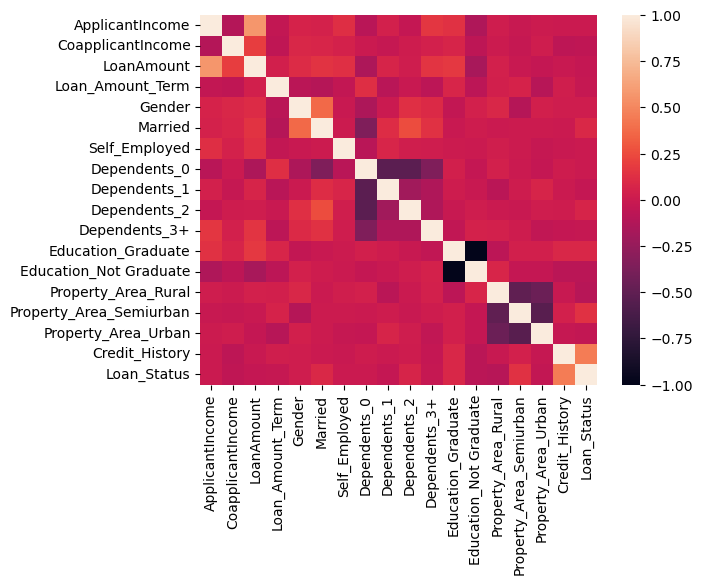

In [71]:
sns.heatmap(full_df.corr())

## Feature Generation


1. **Total Income**: Combine `ApplicantIncome` and `CoapplicantIncome` to create a new feature representing the total income of the applicant and co-applicant.

2. **Loan Amount to Total Income Ratio**: Calculate the ratio of `LoanAmount` to the total income to assess the loan amount in relation to the applicant's financial situation.

3. **Dependents Ratio**: Convert `Dependents` into a numerical feature representing the ratio of dependents to the total number of family members (applicant + co-applicant).

4. **Income Stability**: Calculate the standard deviation or coefficient of variation of `ApplicantIncome` and `CoapplicantIncome` to represent income stability.


In [72]:
## import our cleaned_df
cleaned_df = pd.read_excel('data/copy_loan_cleaned.xlsx', index_col = 'Loan_ID')
cleaned_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.369492,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N


In [73]:
num_values.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001002,5849,0.0,146.369492,360
LP001003,4583,1508.0,128.000000,360
LP001005,3000,0.0,66.000000,360
LP001006,2583,2358.0,120.000000,360
LP001008,6000,0.0,141.000000,360


##### Forget about this one

In [74]:
# from sklearn.base import BaseEstimator, TransformerMixin

# applicant_income_ix, coapplicant_income_ix, loan_amt_ix, dependents_ix = 0, 1, 2, 4

# class AttributesAdder(TransformerMixin, BaseEstimator):
#     def __init__(self, income_stability=False):
#         self.income_stability = income_stability
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         total_income = X.iloc[:, applicant_income_ix] + X.iloc[:, coapplicant_income_ix]
#         loan_amt_to_total_income_ratio = X.iloc[:, loan_amt_ix] / total_income
        
#         dependents = X.iloc[:, dependents_ix]
#         dependents[dependents == '3+'] = '3'
#         dependents = dependents.astype(int)
    
#         dependents_ratio = dependents / (dependents+1)

#         if self.income_stability:
#             pass

#         return np.c_[X, total_income, loan_amt_to_total_income_ratio, dependents_ratio]

### Total Income
`total_income = applicant_inceme + coapplicant_income`

In [75]:
total_income = cleaned_df['ApplicantIncome'] + cleaned_df['CoapplicantIncome']

### Loan Amount to Total Income Ratio

`loan_amt_to_total_income_ratio = LoanAmt / total_income`

In [76]:
loan_amt_to_total_income_ratio = cleaned_df['LoanAmount'] / total_income

### Dependents Ratio

`dependents_ratio = (dependents / (dependents+1)`

In [77]:
dependents = cleaned_df['Dependents'].replace('3+', 3).astype(float)

total_family_members = dependents + 1

# Calculate Dependents Ratio
dependents_ratio = dependents / total_family_members

/tmp/ipykernel_80400/3236854274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dependents = cleaned_df['Dependents'].replace('3+', 3).astype(float)


### Income Stability

* `ApplicantIncomeStd = ApplicantIncome.std()`

* `CoapplcantIncomeStd = CoapplicantIncome.std()` 

In [78]:
new_columns = {
    'TotalIncome': total_income,
    'LoanAmtToTotalIncomeRatio': loan_amt_to_total_income_ratio,
    'DependentsRatio': dependents_ratio 
}

new_columns_df = pd.DataFrame(new_columns)
new_columns_df.sample(20)

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio
Loan_ID,,,
LP002065,15000.0,0.020000,0.750000
LP002255,9167.0,0.020181,0.750000
LP002489,5191.0,0.025429,0.500000
LP001404,5450.0,0.028257,0.000000
LP002318,3867.0,0.016033,0.500000
LP001896,3900.0,0.023077,0.666667
LP001334,4188.0,0.027459,0.000000
LP002804,6486.0,0.028060,0.000000
LP001034,3596.0,0.027809,0.500000


In [79]:
new_col_std = StandardScaler()
new_col_std.fit(new_columns_df)
joblib.dump(new_col_std, open('models_and_encoders/new_col_scaler.joblib', 'wb'))
new_columns_scaled = new_col_std.transform(new_columns_df)

In [80]:
new_columns_scaled_df = pd.DataFrame(data = new_columns_scaled, index = new_columns_df.index, columns = new_columns_df.columns)

In [81]:
full_df_engineered = pd.concat([new_columns_scaled_df, full_df], axis = 1)
full_df_engineered.sample(10)

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP002448,-0.208220,0.249490,-0.825068,-0.237340,0.035854,3.125167e-02,0.275516,1,1,0,True,False,False,False,True,False,True,False,False,0,0
LP001922,2.109206,-1.893419,-0.825068,2.496420,-0.555746,-3.376631e-16,0.275516,1,1,0,True,False,False,False,True,False,True,False,False,1,0
LP002129,-0.320179,0.926631,-0.825068,-0.474269,0.283349,1.619368e-01,0.275516,1,1,0,True,False,False,False,True,False,False,True,False,1,1
LP002050,0.459668,-0.951244,0.784671,0.752235,-0.555746,1.025345e-01,0.275516,1,1,1,False,True,False,False,True,False,True,False,False,1,0
LP002219,1.038947,-1.627589,1.589540,0.547845,1.149754,-1.944772e-01,0.275516,1,1,0,False,False,False,True,True,False,True,False,False,1,1
LP001665,-0.204045,0.647391,0.784671,-0.371911,0.326021,2.807414e-01,0.275516,1,1,0,False,True,False,False,True,False,False,True,False,1,0
LP001640,5.701480,-2.380148,-0.825068,5.518124,1.065776,-3.132818e-01,0.275516,1,1,1,True,False,False,False,True,False,False,True,False,1,1
LP001195,-0.511004,0.200005,-0.825068,-0.534278,-0.012621,-5.984130e-01,0.275516,1,1,0,True,False,False,False,True,False,False,True,False,1,1
LP002872,-0.267601,0.187609,-0.825068,-0.378124,0.198689,-1.231944e-01,0.275516,1,1,0,True,False,False,False,True,False,False,True,False,0,0


<Axes: >

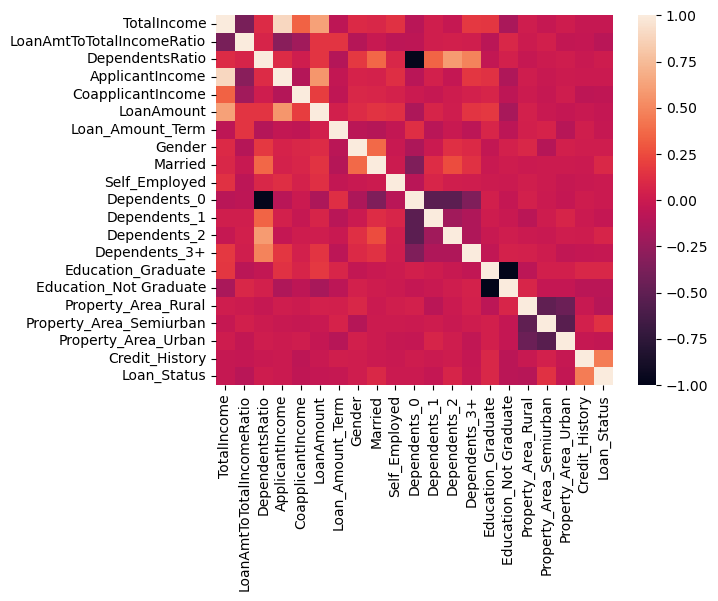

In [82]:
sns.heatmap(full_df_engineered.corr())

In [83]:
full_df_engineered.to_excel('data/engineered_df.xlsx', index=None)

## Splitting The Data Into Train and Test Sets

In [84]:
X = full_df_engineered.drop('Loan_Status', axis = 1)
y = full_df_engineered['Loan_Status'].copy()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((488, 20), (123, 20), (488,), (123,))

## Choosing The Best Models

## Steps 
* Choosing Classification Models
* Cross Validation

### Types of Classification Models

#### Importing Classification Models

In [86]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

#### Instatiate the models

In [87]:
xgb_classifier = XGBClassifier()
tree_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
log_classier = LogisticRegression()
nb_classifier = MultinomialNB()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()